#### 1) Загрузите данные ex3data1.mat из файла.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 3/'

In [4]:
files_names = os.listdir(DATA_PATH)
print(files_names)
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

['ex3data1.mat']


In [24]:
from scipy.io import loadmat

data = loadmat(files_paths[0])

X, y = data['X'], data['y'].flatten()
print(X.shape, y.shape)

Xval, yval = data['Xval'], data['yval'].flatten()
print(Xval.shape, yval.shape)

Xtest, ytest = data['Xval'], data['yval'].flatten()
print(Xtest.shape, ytest.shape)

(12, 1) (12,)
(21, 1) (21,)
(21, 1) (21,)


#### 2) Постройте график, где по осям откладываются X и y из обучающей выборки.

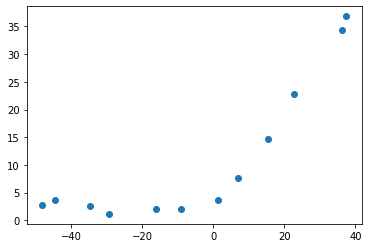

In [25]:
plt.scatter(X.flatten(), y)

#### 3) Реализуйте функцию стоимости потерь для линейной регрессии с L2-регуляризацией.

In [46]:
@np.vectorize
def hack_log(x):
    return np.log(x) if x != 0 else 0

def loss_l2(y_pred, y_true, w, lambda_):
    y_pred, y_true, w = np.array(y_pred), np.array(y_true), np.array(w)
    m = y_pred.shape[0]
    l2_value = lambda_ * w.dot(w) / 2
    return 1/(2*m) * ((y_pred - y_true) ** 2).sum() + l2_value

#### 4) Реализуйте функцию градиентного спуска для линейной регрессии с L2-регуляризацией.

In [122]:
class LinearRegressionL2:
    def __init__(self, w=None, lr=0.01, lambda_=0.001):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
        self.lambda_ = lambda_
        assert self.lr * self.lambda_ < 1
    
    def _calc_grad(self, prediction, labels, data_with_offset):
        return ((prediction - labels) * data_with_offset.T).T.mean(axis=0)
    
    def _log_history(self, iterarion, prediction, labels, grad):
        loss_value = loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_)
        self.history.append((iterarion, loss_value, grad))
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        prediction = self.predict(data_with_offset)
        if verbosity:
            print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
        if optimizer == 'grad':
            grad = self._calc_grad(prediction, labels, data_with_offset)
            l2_part_value = self.lambda_ * self.w
            iterarion = 0
            self._log_history(iterarion, prediction, labels, grad)
            while not np.allclose(self.lr * (grad + l2_part_value), np.zeros(grad.shape)):
                l2_part_value = self.lambda_ * self.w
                self.w -= self.lr * (grad + l2_part_value)
                prediction = self.predict(data_with_offset)
                grad = self._calc_grad(prediction, labels, data_with_offset)
                iterarion += 1
                self._log_history(iterarion, prediction, labels, grad)
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        if verbosity:
            print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return data_with_offset.dot(self.w)
    
    def evaluate(self, data, labels):
        prediction = self.predict(data)
        return loss_l2(y_pred=prediction, y_true=labels, w=self.w, lambda_=self.lambda_)

#### 5) Постройте модель линейной регрессии с коэффициентом регуляризации 0 и постройте график полученной функции совместно с графиком из пункта 2. Почему регуляризация в данном случае не сработает?

In [66]:
lreg_l2 = LinearRegressionL2(lr=0.001, lambda_=0)
lreg_l2.fit(X, y)

140.95412088055392
(1, 106.08297267143769)
(2, 105.13020568934687)
(3, 104.95177851873748)
(4, 104.79132585997874)
(5, 104.63158646483483)
(6, 104.47216583503166)
(7, 104.31305438166737)
(8, 104.15425130081343)
(9, 103.99575599015316)
(10, 103.8375678531024)
(11, 103.67968629433756)
(12, 103.52211071969101)
(13, 103.36484053614689)
(14, 103.20787515183856)
(15, 103.05121397604644)
(16, 102.89485641919579)
(17, 102.73880189285461)
(18, 102.58304980973114)
(19, 102.42759958367198)
(20, 102.27245062965966)
(21, 102.1176023638105)
(22, 101.96305420337254)
(23, 101.80880556672304)
(24, 101.65485587336657)
(25, 101.5012045439328)
(26, 101.34785100017419)
(27, 101.19479466496387)
(28, 101.04203496229349)
(29, 100.88957131727102)
(30, 100.73740315611867)
(31, 100.58552990617063)
(32, 100.43395099587093)
(33, 100.28266585477128)
(34, 100.13167391352911)
(35, 99.98097460390507)
(36, 99.83056735876121)
(37, 99.68045161205873)
(38, 99.53062679885576)
(39, 99.38109235530541)
(40, 99.23184771865354)

(831, 38.94177126253256)
(832, 38.909661727173095)
(833, 38.87761442205726)
(834, 38.84562922657905)
(835, 38.81370602036616)
(836, 38.781844683279644)
(837, 38.75004509541331)
(838, 38.71830713709343)
(839, 38.686630688878154)
(840, 38.65501563155712)
(841, 38.62346184615104)
(842, 38.5919692139112)
(843, 38.560537616319)
(844, 38.5291669350856)
(845, 38.49785705215132)
(846, 38.466607849685374)
(847, 38.435419210085286)
(848, 38.404291015976526)
(849, 38.37322315021202)
(850, 38.34221549587177)
(851, 38.31126793626233)
(852, 38.280380354916446)
(853, 38.24955263559257)
(854, 38.21878466227446)
(855, 38.18807631917069)
(856, 38.15742749071424)
(857, 38.1268380615621)
(858, 38.09630791659478)
(859, 38.06583694091591)
(860, 38.035425019851786)
(861, 38.00507203895094)
(862, 37.97477788398377)
(863, 37.94454244094196)
(864, 37.91436559603825)
(865, 37.88424723570584)
(866, 37.854187246598094)
(867, 37.82418551558798)
(868, 37.794241929767715)
(869, 37.76435637644839)
(870, 37.73452874315

(1541, 26.553050314495977)
(1542, 26.544950878139833)
(1543, 26.53686713898678)
(1544, 26.52879906661469)
(1545, 26.52074663066037)
(1546, 26.512709800819483)
(1547, 26.504688546846424)
(1548, 26.496682838554236)
(1549, 26.488692645814414)
(1550, 26.48071793855687)
(1551, 26.4727586867698)
(1552, 26.464814860499548)
(1553, 26.45688642985053)
(1554, 26.448973364985083)
(1555, 26.441075636123387)
(1556, 26.433193213543305)
(1557, 26.42532606758035)
(1558, 26.4174741686275)
(1559, 26.409637487135118)
(1560, 26.401815993610825)
(1561, 26.39400965861941)
(1562, 26.38621845278272)
(1563, 26.378442346779522)
(1564, 26.37068131134541)
(1565, 26.362935317272715)
(1566, 26.355204335410335)
(1567, 26.34748833666371)
(1568, 26.339787291994632)
(1569, 26.332101172421183)
(1570, 26.324429949017635)
(1571, 26.316773592914267)
(1572, 26.30913207529737)
(1573, 26.30150536740904)
(1574, 26.293893440547112)
(1575, 26.286296266065058)
(1576, 26.278713815371862)
(1577, 26.271146059931915)
(1578, 26.2635929

(2249, 23.43216825909724)
(2250, 23.430117283065787)
(2251, 23.42807028195134)
(2252, 23.426027248050264)
(2253, 23.423988173673862)
(2254, 23.421953051148325)
(2255, 23.419921872814733)
(2256, 23.417894631028986)
(2257, 23.415871318161834)
(2258, 23.413851926598774)
(2259, 23.411836448740107)
(2260, 23.409824877000794)
(2261, 23.40781720381057)
(2262, 23.405813421613793)
(2263, 23.403813522869473)
(2264, 23.40181750005127)
(2265, 23.399825345647372)
(2266, 23.39783705216057)
(2267, 23.39585261210816)
(2268, 23.39387201802196)
(2269, 23.39189526244826)
(2270, 23.38992233794777)
(2271, 23.387953237095648)
(2272, 23.385987952481422)
(2273, 23.38402647670899)
(2274, 23.382068802396592)
(2275, 23.38011492217676)
(2276, 23.378164828696313)
(2277, 23.376218514616312)
(2278, 23.374275972612047)
(2279, 23.372337195373014)
(2280, 23.370402175602877)
(2281, 23.368470906019397)
(2282, 23.366543379354518)
(2283, 23.36461958835422)
(2284, 23.362699525778545)
(2285, 23.360783184401605)
(2286, 23.358

(2914, 22.665197214871426)
(2915, 22.664632675638558)
(2916, 22.664069230517256)
(2917, 22.663506877387064)
(2918, 22.66294561413163)
(2919, 22.662385438638722)
(2920, 22.66182634880018)
(2921, 22.66126834251195)
(2922, 22.660711417674037)
(2923, 22.660155572190533)
(2924, 22.65960080396956)
(2925, 22.659047110923353)
(2926, 22.658494490968128)
(2927, 22.657942942024178)
(2928, 22.657392462015824)
(2929, 22.656843048871398)
(2930, 22.65629470052325)
(2931, 22.65574741490775)
(2932, 22.65520118996524)
(2933, 22.654656023640086)
(2934, 22.654111913880616)
(2935, 22.65356885863914)
(2936, 22.653026855871936)
(2937, 22.65248590353926)
(2938, 22.651945999605292)
(2939, 22.65140714203817)
(2940, 22.65086932880998)
(2941, 22.650332557896718)
(2942, 22.649796827278326)
(2943, 22.64926213493864)
(2944, 22.64872847886541)
(2945, 22.64819585705029)
(2946, 22.647664267488835)
(2947, 22.647133708180466)
(2948, 22.646604177128488)
(2949, 22.646075672340082)
(2950, 22.64554819182628)
(2951, 22.645021

(3656, 22.442960239723025)
(3657, 22.442826409342008)
(3658, 22.442692838332466)
(3659, 22.4425595261917)
(3660, 22.44242647241802)
(3661, 22.4422936765107)
(3662, 22.442161137969965)
(3663, 22.44202885629703)
(3664, 22.441896830994068)
(3665, 22.441765061564215)
(3666, 22.44163354751159)
(3667, 22.441502288341226)
(3668, 22.441371283559178)
(3669, 22.44124053267241)
(3670, 22.441110035188846)
(3671, 22.440979790617405)
(3672, 22.440849798467895)
(3673, 22.44072005825113)
(3674, 22.440590569478843)
(3675, 22.440461331663705)
(3676, 22.440332344319373)
(3677, 22.440203606960395)
(3678, 22.440075119102303)
(3679, 22.43994688026153)
(3680, 22.43981888995548)
(3681, 22.43969114770246)
(3682, 22.439563653021754)
(3683, 22.43943640543354)
(3684, 22.439309404458932)
(3685, 22.439182649619973)
(3686, 22.439056140439654)
(3687, 22.43892987644186)
(3688, 22.43880385715142)
(3689, 22.43867808209407)
(3690, 22.43855255079648)
(3691, 22.438427262786224)
(3692, 22.438302217591797)
(3693, 22.43817741

(4353, 22.39176974968668)
(4354, 22.391735129606637)
(4355, 22.39170057662242)
(4356, 22.391666090604005)
(4357, 22.391631671421592)
(4358, 22.39159731894567)
(4359, 22.39156303304694)
(4360, 22.391528813596388)
(4361, 22.39149466046522)
(4362, 22.391460573524903)
(4363, 22.391426552647168)
(4364, 22.39139259770397)
(4365, 22.39135870856753)
(4366, 22.391324885110322)
(4367, 22.39129112720503)
(4368, 22.391257434724626)
(4369, 22.39122380754231)
(4370, 22.391190245531536)
(4371, 22.39115674856598)
(4372, 22.391123316519604)
(4373, 22.391089949266572)
(4374, 22.39105664668132)
(4375, 22.391023408638517)
(4376, 22.39099023501307)
(4377, 22.39095712568014)
(4378, 22.390924080515124)
(4379, 22.39089109939365)
(4380, 22.390858182191614)
(4381, 22.390825328785134)
(4382, 22.390792539050558)
(4383, 22.390759812864502)
(4384, 22.390727150103785)
(4385, 22.390694550645506)
(4386, 22.390662014366967)
(4387, 22.390629541145728)
(4388, 22.390597130859575)
(4389, 22.39056478338654)
(4390, 22.390532

(5051, 22.37851851779626)
(5052, 22.37850957941419)
(5053, 22.378500658355236)
(5054, 22.378491754585838)
(5055, 22.378482868072496)
(5056, 22.37847399878176)
(5057, 22.378465146680256)
(5058, 22.37845631173466)
(5059, 22.378447493911736)
(5060, 22.378438693178285)
(5061, 22.378429909501197)
(5062, 22.378421142847404)
(5063, 22.37841239318394)
(5064, 22.378403660477844)
(5065, 22.378394944696282)
(5066, 22.378386245806418)
(5067, 22.378377563775544)
(5068, 22.378368898570976)
(5069, 22.378360250160107)
(5070, 22.378351618510383)
(5071, 22.37834300358933)
(5072, 22.378334405364527)
(5073, 22.378325823803593)
(5074, 22.378317258874254)
(5075, 22.37830871054428)
(5076, 22.378300178781487)
(5077, 22.37829166355377)
(5078, 22.378283164829092)
(5079, 22.378274682575455)
(5080, 22.37826621676094)
(5081, 22.378257767353706)
(5082, 22.37824933432193)
(5083, 22.378240917633892)
(5084, 22.3782325172579)
(5085, 22.378224133162355)
(5086, 22.378215765315705)
(5087, 22.378207413686454)
(5088, 22.378

(5645, 22.375363439249263)
(5646, 22.375360615602403)
(5647, 22.37535779742793)
(5648, 22.375354984715262)
(5649, 22.3753521774538)
(5650, 22.375349375632993)
(5651, 22.37534657924227)
(5652, 22.375343788271127)
(5653, 22.375341002709067)
(5654, 22.375338222545597)
(5655, 22.375335447770244)
(5656, 22.375332678372576)
(5657, 22.375329914342174)
(5658, 22.37532715566863)
(5659, 22.375324402341565)
(5660, 22.375321654350618)
(5661, 22.375318911685444)
(5662, 22.375316174335723)
(5663, 22.37531344229115)
(5664, 22.375310715541453)
(5665, 22.37530799407636)
(5666, 22.37530527788563)
(5667, 22.37530256695904)
(5668, 22.375299861286408)
(5669, 22.37529716085752)
(5670, 22.37529446566223)
(5671, 22.3752917756904)
(5672, 22.375289090931894)
(5673, 22.37528641137662)
(5674, 22.375283737014488)
(5675, 22.37528106783543)
(5676, 22.375278403829405)
(5677, 22.375275744986386)
(5678, 22.375273091296364)
(5679, 22.37527044274936)
(5680, 22.375267799335404)
(5681, 22.37526516104454)
(5682, 22.37526252

(6179, 22.37442355961209)
(6180, 22.374422557509455)
(6181, 22.374421557348953)
(6182, 22.374420559126825)
(6183, 22.374419562839314)
(6184, 22.37441856848267)
(6185, 22.37441757605315)
(6186, 22.374416585547017)
(6187, 22.374415596960546)
(6188, 22.374414610290017)
(6189, 22.37441362553171)
(6190, 22.374412642681936)
(6191, 22.374411661736975)
(6192, 22.374410682693153)
(6193, 22.37440970554677)
(6194, 22.374408730294164)
(6195, 22.374407756931653)
(6196, 22.37440678545558)
(6197, 22.37440581586229)
(6198, 22.374404848148124)
(6199, 22.37440388230944)
(6200, 22.37440291834263)
(6201, 22.374401956244036)
(6202, 22.374400996010046)
(6203, 22.374400037637052)
(6204, 22.374399081121442)
(6205, 22.374398126459624)
(6206, 22.374397173647996)
(6207, 22.374396222682968)
(6208, 22.374395273560978)
(6209, 22.374394326278438)
(6210, 22.374393380831783)
(6211, 22.37439243721748)
(6212, 22.374391495431944)
(6213, 22.374390555471653)
(6214, 22.37438961733306)
(6215, 22.374388681012633)
(6216, 22.37

(6660, 22.374109870950253)
(6661, 22.37410947679543)
(6662, 22.37410908340451)
(6663, 22.374108690776)
(6664, 22.37410829890843)
(6665, 22.374107907800326)
(6666, 22.374107517450206)
(6667, 22.37410712785661)
(6668, 22.374106739018075)
(6669, 22.374106350933133)
(6670, 22.374105963600318)
(6671, 22.374105577018177)
(6672, 22.374105191185265)
(6673, 22.37410480610012)
(6674, 22.374104421761277)
(6675, 22.37410403816732)
(6676, 22.37410365531679)
(6677, 22.37410327320824)
(6678, 22.374102891840245)
(6679, 22.374102511211376)
(6680, 22.374102131320175)
(6681, 22.374101752165235)
(6682, 22.37410137374512)
(6683, 22.374100996058395)
(6684, 22.374100619103658)
(6685, 22.374100242879493)
(6686, 22.37409986738445)
(6687, 22.374099492617162)
(6688, 22.374099118576176)
(6689, 22.37409874526012)
(6690, 22.374098372667568)
(6691, 22.374098000797122)
(6692, 22.37409762964738)
(6693, 22.374097259216956)
(6694, 22.374096889504443)
(6695, 22.374096520508463)
(6696, 22.374096152227608)
(6697, 22.374095

(7303, 22.373964915981205)
(7304, 22.373964802757975)
(7305, 22.37396468975419)
(7306, 22.3739645769694)
(7307, 22.3739644644032)
(7308, 22.373964352055168)
(7309, 22.373964239924867)
(7310, 22.373964128011878)
(7311, 22.37396401631579)
(7312, 22.373963904836177)
(7313, 22.373963793572607)
(7314, 22.373963682524675)
(7315, 22.373963571691974)
(7316, 22.37396346107406)
(7317, 22.37396335067053)
(7318, 22.37396324048098)
(7319, 22.37396313050498)
(7320, 22.373963020742114)
(7321, 22.37396291119198)
(7322, 22.373962801854155)
(7323, 22.37396269272824)
(7324, 22.37396258381382)
(7325, 22.37396247511048)
(7326, 22.37396236661781)
(7327, 22.37396225833541)
(7328, 22.37396215026286)
(7329, 22.37396204239977)
(7330, 22.373961934745726)
(7331, 22.373961827300313)
(7332, 22.373961720063143)
(7333, 22.373961613033806)
(7334, 22.3739615062119)
(7335, 22.373961399597015)
(7336, 22.37396129318876)
(7337, 22.373961186986737)
(7338, 22.37396108099052)
(7339, 22.37396097519975)
(7340, 22.37396086961398

(8122, 22.37391842278027)
(8123, 22.373918399663722)
(8124, 22.373918376591963)
(8125, 22.37391835356492)
(8126, 22.373918330582512)
(8127, 22.373918307644637)
(8128, 22.37391828475122)
(8129, 22.373918261902176)
(8130, 22.373918239097407)
(8131, 22.37391821633684)
(8132, 22.373918193620383)
(8133, 22.37391817094795)
(8134, 22.37391814831946)
(8135, 22.373918125734825)
(8136, 22.37391810319396)
(8137, 22.373918080696782)
(8138, 22.3739180582432)
(8139, 22.373918035833146)
(8140, 22.37391801346651)
(8141, 22.373917991143234)
(8142, 22.37391796886321)
(8143, 22.37391794662637)
(8144, 22.373917924432632)
(8145, 22.37391790228191)
(8146, 22.373917880174105)
(8147, 22.373917858109156)
(8148, 22.373917836086967)
(8149, 22.373917814107458)
(8150, 22.37391779217055)
(8151, 22.373917770276144)
(8152, 22.373917748424184)
(8153, 22.373917726614568)
(8154, 22.37391770484723)
(8155, 22.373917683122073)
(8156, 22.373917661439013)
(8157, 22.373917639797984)
(8158, 22.373917618198895)
(8159, 22.373917

(8846, 22.373909423178247)
(8847, 22.373909417503484)
(8848, 22.373909411839694)
(8849, 22.373909406186897)
(8850, 22.373909400545045)
(8851, 22.373909394914136)
(8852, 22.373909389294134)
(8853, 22.373909383685024)
(8854, 22.373909378086786)
(8855, 22.3739093724994)
(8856, 22.373909366922845)
(8857, 22.373909361357086)
(8858, 22.373909355802127)
(8859, 22.37390935025792)
(8860, 22.373909344724474)
(8861, 22.373909339201745)
(8862, 22.373909333689724)
(8863, 22.373909328188375)
(8864, 22.3739093226977)
(8865, 22.37390931721766)
(8866, 22.37390931174824)
(8867, 22.37390930628942)
(8868, 22.373909300841177)
(8869, 22.373909295403493)
(8870, 22.373909289976357)
(8871, 22.37390928455973)
(8872, 22.373909279153608)
(8873, 22.37390927375795)
(8874, 22.37390926837276)
(8875, 22.373909262998005)
(8876, 22.37390925763367)
(8877, 22.373909252279724)
(8878, 22.373909246936158)
(8879, 22.373909241602952)
(8880, 22.373909236280078)
(8881, 22.373909230967516)
(8882, 22.373909225665265)
(8883, 22.373

(9527, 22.37390727643946)
(9528, 22.373907274925195)
(9529, 22.373907273413863)
(9530, 22.373907271905466)
(9531, 22.373907270399982)
(9532, 22.37390726889742)
(9533, 22.373907267397772)
(9534, 22.373907265901025)
(9535, 22.373907264407183)
(9536, 22.37390726291624)
(9537, 22.373907261428176)
(9538, 22.373907259943003)
(9539, 22.37390725846071)
(9540, 22.37390725698129)
(9541, 22.373907255504733)
(9542, 22.373907254031042)
(9543, 22.373907252560194)
(9544, 22.373907251092213)
(9545, 22.373907249627074)
(9546, 22.373907248164773)
(9547, 22.373907246705304)
(9548, 22.373907245248663)
(9549, 22.37390724379485)
(9550, 22.37390724234385)
(9551, 22.37390724089566)
(9552, 22.373907239450283)
(9553, 22.373907238007703)
(9554, 22.373907236567916)
(9555, 22.37390723513093)
(9556, 22.373907233696716)
(9557, 22.37390723226529)
(9558, 22.37390723083664)
(9559, 22.373907229410747)
(9560, 22.373907227987623)
(9561, 22.37390722656727)
(9562, 22.37390722514965)
(9563, 22.37390722373479)
(9564, 22.37390

(10038, 22.373906785053002)
(10039, 22.373906784491073)
(10040, 22.373906783930238)
(10041, 22.37390678337048)
(10042, 22.373906782811815)
(10043, 22.373906782254227)
(10044, 22.37390678169772)
(10045, 22.3739067811423)
(10046, 22.373906780587937)
(10047, 22.373906780034666)
(10048, 22.373906779482468)
(10049, 22.37390677893133)
(10050, 22.373906778381272)
(10051, 22.373906777832264)
(10052, 22.373906777284333)
(10053, 22.37390677673746)
(10054, 22.373906776191646)
(10055, 22.37390677564689)
(10056, 22.373906775103194)
(10057, 22.373906774560542)
(10058, 22.37390677401895)
(10059, 22.37390677347841)
(10060, 22.373906772938913)
(10061, 22.373906772400463)
(10062, 22.373906771863048)
(10063, 22.37390677132668)
(10064, 22.373906770791354)
(10065, 22.37390677025707)
(10066, 22.373906769723817)
(10067, 22.373906769191585)
(10068, 22.373906768660405)
(10069, 22.37390676813024)
(10070, 22.373906767601113)
(10071, 22.37390676707301)
(10072, 22.37390676654592)
(10073, 22.373906766019864)
(10074

(10646, 22.373906584248505)
(10647, 22.373906584075748)
(10648, 22.37390658390332)
(10649, 22.373906583731234)
(10650, 22.37390658355948)
(10651, 22.373906583388056)
(10652, 22.373906583216968)
(10653, 22.373906583046207)
(10654, 22.373906582875783)
(10655, 22.373906582705676)
(10656, 22.373906582535913)
(10657, 22.373906582366473)
(10658, 22.373906582197364)
(10659, 22.37390658202858)
(10660, 22.373906581860126)
(10661, 22.373906581691998)
(10662, 22.37390658152419)
(10663, 22.37390658135672)
(10664, 22.373906581189562)
(10665, 22.37390658102273)
(10666, 22.37390658085622)
(10667, 22.373906580690047)
(10668, 22.37390658052418)
(10669, 22.373906580358643)
(10670, 22.373906580193424)
(10671, 22.37390658002852)
(10672, 22.373906579863945)
(10673, 22.373906579699682)
(10674, 22.373906579535742)
(10675, 22.373906579372118)
(10676, 22.37390657920881)
(10677, 22.373906579045816)
(10678, 22.373906578883144)
(10679, 22.37390657872078)
(10680, 22.37390657855874)
(10681, 22.373906578397012)
(106

(11221, 22.37390652432552)
(11222, 22.373906524268893)
(11223, 22.373906524212373)
(11224, 22.373906524155974)
(11225, 22.373906524099674)
(11226, 22.37390652404349)
(11227, 22.37390652398742)
(11228, 22.373906523931446)
(11229, 22.373906523875583)
(11230, 22.37390652381984)
(11231, 22.373906523764195)
(11232, 22.373906523708648)
(11233, 22.373906523653226)
(11234, 22.373906523597903)
(11235, 22.37390652354269)
(11236, 22.37390652348759)
(11237, 22.373906523432588)
(11238, 22.3739065233777)
(11239, 22.373906523322905)
(11240, 22.373906523268232)
(11241, 22.373906523213655)
(11242, 22.373906523159185)
(11243, 22.37390652310482)
(11244, 22.373906523050568)
(11245, 22.37390652299641)
(11246, 22.373906522942367)
(11247, 22.373906522888422)
(11248, 22.37390652283458)
(11249, 22.37390652278085)
(11250, 22.373906522727218)
(11251, 22.373906522673686)
(11252, 22.373906522620267)
(11253, 22.373906522566955)
(11254, 22.373906522513735)
(11255, 22.373906522460622)
(11256, 22.373906522407612)
(112

(11838, 22.373906503935718)
(11839, 22.37390650391861)
(11840, 22.373906503901537)
(11841, 22.3739065038845)
(11842, 22.37390650386749)
(11843, 22.37390650385051)
(11844, 22.37390650383357)
(11845, 22.373906503816663)
(11846, 22.373906503799788)
(11847, 22.373906503782948)
(11848, 22.37390650376613)
(11849, 22.373906503749357)
(11850, 22.373906503732606)
(11851, 22.373906503715894)
(11852, 22.37390650369921)
(11853, 22.373906503682562)
(11854, 22.373906503665953)
(11855, 22.373906503649366)
(11856, 22.373906503632814)
(11857, 22.37390650361629)
(11858, 22.373906503599805)
(11859, 22.37390650358335)
(11860, 22.37390650356693)
(11861, 22.37390650355053)
(11862, 22.373906503534176)
(11863, 22.373906503517848)
(11864, 22.373906503501544)
(11865, 22.37390650348528)
(11866, 22.373906503469048)
(11867, 22.373906503452844)
(11868, 22.37390650343667)
(11869, 22.373906503420532)
(11870, 22.373906503404427)
(11871, 22.373906503388348)
(11872, 22.373906503372304)
(11873, 22.373906503356288)
(11874

(12540, 22.373906497370243)
(12541, 22.373906497365855)
(12542, 22.373906497361492)
(12543, 22.37390649735712)
(12544, 22.373906497352763)
(12545, 22.373906497348415)
(12546, 22.37390649734408)
(12547, 22.37390649733974)
(12548, 22.373906497335415)
(12549, 22.373906497331106)
(12550, 22.3739064973268)
(12551, 22.3739064973225)
(12552, 22.37390649731821)
(12553, 22.373906497313925)
(12554, 22.37390649730965)
(12555, 22.373906497305388)
(12556, 22.373906497301128)
(12557, 22.373906497296886)
(12558, 22.37390649729264)
(12559, 22.37390649728841)
(12560, 22.37390649728419)
(12561, 22.373906497279968)
(12562, 22.373906497275758)
(12563, 22.373906497271566)
(12564, 22.37390649726737)
(12565, 22.373906497263192)
(12566, 22.373906497259014)
(12567, 22.373906497254843)
(12568, 22.373906497250687)
(12569, 22.37390649724654)
(12570, 22.37390649724239)
(12571, 22.37390649723826)
(12572, 22.373906497234135)
(12573, 22.373906497230013)
(12574, 22.373906497225907)
(12575, 22.373906497221803)
(12576, 

(13221, 22.373906495712333)
(13222, 22.373906495711157)
(13223, 22.373906495709992)
(13224, 22.373906495708827)
(13225, 22.373906495707665)
(13226, 22.373906495706507)
(13227, 22.37390649570535)
(13228, 22.37390649570419)
(13229, 22.373906495703032)
(13230, 22.37390649570188)
(13231, 22.37390649570073)
(13232, 22.373906495699586)
(13233, 22.373906495698442)
(13234, 22.3739064956973)
(13235, 22.373906495696165)
(13236, 22.373906495695024)
(13237, 22.373906495693888)
(13238, 22.37390649569275)
(13239, 22.37390649569162)
(13240, 22.37390649569049)
(13241, 22.37390649568937)
(13242, 22.373906495688235)
(13243, 22.373906495687116)
(13244, 22.373906495685993)
(13245, 22.37390649568488)
(13246, 22.373906495683762)
(13247, 22.373906495682647)
(13248, 22.37390649568154)
(13249, 22.373906495680423)
(13250, 22.373906495679314)
(13251, 22.373906495678217)
(13252, 22.373906495677108)
(13253, 22.37390649567601)
(13254, 22.373906495674905)
(13255, 22.373906495673815)
(13256, 22.37390649567272)
(13257

(13962, 22.373906495252232)
(13963, 22.37390649525196)
(13964, 22.37390649525168)
(13965, 22.373906495251404)
(13966, 22.373906495251127)
(13967, 22.373906495250854)
(13968, 22.37390649525057)
(13969, 22.3739064952503)
(13970, 22.373906495250033)
(13971, 22.373906495249756)
(13972, 22.37390649524949)
(13973, 22.373906495249216)
(13974, 22.373906495248935)
(13975, 22.37390649524867)
(13976, 22.3739064952484)
(13977, 22.37390649524813)
(13978, 22.373906495247855)
(13979, 22.37390649524758)
(13980, 22.373906495247315)
(13981, 22.37390649524705)
(13982, 22.373906495246786)
(13983, 22.373906495246516)
(13984, 22.373906495246246)
(13985, 22.37390649524598)
(13986, 22.37390649524572)
(13987, 22.37390649524545)
(13988, 22.373906495245183)
(13989, 22.373906495244924)
(13990, 22.373906495244658)
(13991, 22.3739064952444)
(13992, 22.373906495244128)
(13993, 22.373906495243872)
(13994, 22.373906495243606)
(13995, 22.37390649524335)
(13996, 22.37390649524309)
(13997, 22.373906495242824)
(13998, 22.

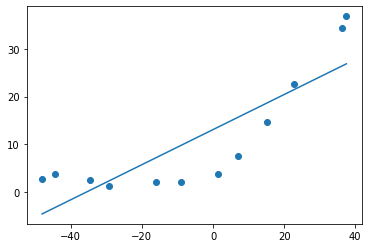

In [61]:
plt.scatter(X.flatten(), y)
x = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
plt.plot(x, lreg_l2.predict(x).flatten())
plt.show()

#### 6) Постройте график процесса обучения (learning curves) для обучающей и валидационной выборки. По оси абсцисс откладывается число элементов из обучающей выборки, а по оси ординат - ошибка (значение функции потерь) для обучающей выборки (первая кривая) и валидационной выборки (вторая кривая). Какой вывод можно сделать по построенному графику?

In [67]:
lreg_l2_val = LinearRegressionL2(lr=0.001, lambda_=0)
lreg_l2_val.fit(Xval, yval)

164.11579386415292
(1, 129.66280052133254)
(2, 129.06321274751443)
(3, 128.8610964802281)
(4, 128.6640246399952)
(5, 128.46739344642418)
(6, 128.27114815136432)
(7, 128.07528736667595)
(8, 127.87981033157531)
(9, 127.68471629409592)
(10, 127.49000450383058)
(11, 127.29567421184332)
(12, 127.10172467066559)
(13, 126.90815513429344)
(14, 126.71496485818444)
(15, 126.52215309925504)
(16, 126.3297191158775)
(17, 126.13766216787725)
(18, 125.94598151652993)
(19, 125.75467642455851)
(20, 125.56374615613053)
(21, 125.37318997685524)
(22, 125.18300715378082)
(23, 124.99319695539147)
(24, 124.80375865160462)
(25, 124.61469151376826)
(26, 124.42599481465791)
(27, 124.23766782847406)
(28, 124.04970983083908)
(29, 123.86212009879478)
(30, 123.67489791079937)
(31, 123.48804254672484)
(32, 123.30155328785403)
(33, 123.11542941687806)
(34, 122.9296702178934)
(35, 122.74427497639927)
(36, 122.55924297929468)
(37, 122.37457351487592)
(38, 122.19026587283366)
(39, 122.00631934425041)
(40, 121.8227332215

(696, 54.13737873751554)
(697, 54.086768044559555)
(698, 54.03625651299585)
(699, 53.98584394853778)
(700, 53.93553015727935)
(701, 53.885314945694525)
(702, 53.83519812063641)
(703, 53.785179489336564)
(704, 53.7352588594042)
(705, 53.685436038825515)
(706, 53.63571083596293)
(707, 53.5860830595543)
(708, 53.53655251871225)
(709, 53.48711902292339)
(710, 53.43778238204763)
(711, 53.3885424063174)
(712, 53.33939890633691)
(713, 53.29035169308153)
(714, 53.24140057789694)
(715, 53.19254537249843)
(716, 53.14378588897022)
(717, 53.09512193976474)
(718, 53.04655333770182)
(719, 52.99807989596808)
(720, 52.94970142811614)
(721, 52.90141774806396)
(722, 52.853228670094026)
(723, 52.80513400885275)
(724, 52.75713357934971)
(725, 52.7092271969569)
(726, 52.66141467740806)
(727, 52.613695836798016)
(728, 52.566070491581854)
(729, 52.51853845857431)
(730, 52.47109955494904)
(731, 52.42375359823787)
(732, 52.3765004063302)
(733, 52.32933979747218)
(734, 52.28227159026611)
(735, 52.23529560366967

(1531, 33.32899169131057)
(1532, 33.31915081417953)
(1533, 33.30932921825212)
(1534, 33.29952686575076)
(1535, 33.28974371897183)
(1536, 33.27997974028563)
(1537, 33.270234892136166)
(1538, 33.26050913704103)
(1539, 33.25080243759125)
(1540, 33.24111475645115)
(1541, 33.23144605635821)
(1542, 33.22179630012292)
(1543, 33.21216545062861)
(1544, 33.2025534708314)
(1545, 33.1929603237599)
(1546, 33.18338597251521)
(1547, 33.173830380270736)
(1548, 33.164293510272)
(1549, 33.15477532583659)
(1550, 33.1452757903539)
(1551, 33.1357948672851)
(1552, 33.126332520162926)
(1553, 33.1168887125916)
(1554, 33.1074634082466)
(1555, 33.09805657087465)
(1556, 33.088668164293416)
(1557, 33.07929815239152)
(1558, 33.06994649912832)
(1559, 33.06061316853377)
(1560, 33.051298124708346)
(1561, 33.04200133182279)
(1562, 33.03272275411811)
(1563, 33.02346235590535)
(1564, 33.014220101565485)
(1565, 33.00499595554927)
(1566, 32.995789882377096)
(1567, 32.98660184663893)
(1568, 32.97743181299404)
(1569, 32.968

(2325, 29.364727363337728)
(2326, 29.3626536584615)
(2327, 29.360584016589563)
(2328, 29.358518429761286)
(2329, 29.35645689003162)
(2330, 29.354399389471116)
(2331, 29.35234592016583)
(2332, 29.35029647421734)
(2333, 29.348251043742696)
(2334, 29.346209620874376)
(2335, 29.3441721977603)
(2336, 29.342138766563767)
(2337, 29.340109319463412)
(2338, 29.338083848653202)
(2339, 29.33606234634242)
(2340, 29.33404480475558)
(2341, 29.332031216132457)
(2342, 29.33002157272802)
(2343, 29.328015866812393)
(2344, 29.326014090670895)
(2345, 29.324016236603914)
(2346, 29.32202229692693)
(2347, 29.320032263970514)
(2348, 29.31804613008022)
(2349, 29.31606388761663)
(2350, 29.314085528955275)
(2351, 29.312111046486635)
(2352, 29.310140432616095)
(2353, 29.30817367976392)
(2354, 29.306210780365223)
(2355, 29.30425172686996)
(2356, 29.30229651174285)
(2357, 29.300345127463384)
(2358, 29.298397566525804)
(2359, 29.29645382143904)
(2360, 29.29451388472671)
(2361, 29.292577748927073)
(2362, 29.290645406

(3034, 28.56982160922419)
(3035, 28.56930536101778)
(3036, 28.568790124295067)
(3037, 28.568275897074265)
(3038, 28.56776267737744)
(3039, 28.567250463230568)
(3040, 28.566739252663474)
(3041, 28.566229043709846)
(3042, 28.565719834407222)
(3043, 28.56521162279699)
(3044, 28.564704406924374)
(3045, 28.564198184838443)
(3046, 28.563692954592057)
(3047, 28.563188714241903)
(3048, 28.56268546184849)
(3049, 28.56218319547612)
(3050, 28.561681913192874)
(3051, 28.56118161307064)
(3052, 28.560682293185057)
(3053, 28.560183951615564)
(3054, 28.559686586445356)
(3055, 28.559190195761357)
(3056, 28.558694777654267)
(3057, 28.558200330218515)
(3058, 28.557706851552286)
(3059, 28.557214339757444)
(3060, 28.556722792939617)
(3061, 28.556232209208133)
(3062, 28.555742586675997)
(3063, 28.555253923459976)
(3064, 28.554766217680434)
(3065, 28.55427946746149)
(3066, 28.55379367093093)
(3067, 28.553308826220185)
(3068, 28.55282493146435)
(3069, 28.552341984802183)
(3070, 28.551859984376094)
(3071, 28.5

(3698, 28.37798226657523)
(3699, 28.377841888668165)
(3700, 28.37770178580314)
(3701, 28.377561957441284)
(3702, 28.377422403044744)
(3703, 28.377283122076758)
(3704, 28.37714411400159)
(3705, 28.377005378284565)
(3706, 28.376866914392046)
(3707, 28.376728721791462)
(3708, 28.37659079995125)
(3709, 28.376453148340932)
(3710, 28.37631576643104)
(3711, 28.376178653693135)
(3712, 28.376041809599847)
(3713, 28.375905233624824)
(3714, 28.375768925242735)
(3715, 28.37563288392928)
(3716, 28.37549710916121)
(3717, 28.37536160041626)
(3718, 28.375226357173222)
(3719, 28.375091378911904)
(3720, 28.37495666511312)
(3721, 28.37482221525872)
(3722, 28.374688028831553)
(3723, 28.374554105315486)
(3724, 28.374420444195394)
(3725, 28.374287044957175)
(3726, 28.374153907087702)
(3727, 28.374021030074903)
(3728, 28.373888413407673)
(3729, 28.373756056575914)
(3730, 28.37362395907054)
(3731, 28.373492120383435)
(3732, 28.373360540007525)
(3733, 28.373229217436677)
(3734, 28.37309815216577)
(3735, 28.372

(4348, 28.3263597622469)
(4349, 28.326320528171365)
(4350, 28.326281370967042)
(4351, 28.326242290483332)
(4352, 28.326203286569893)
(4353, 28.326164359076717)
(4354, 28.32612550785408)
(4355, 28.32608673275253)
(4356, 28.32604803362294)
(4357, 28.32600941031644)
(4358, 28.325970862684482)
(4359, 28.325932390578792)
(4360, 28.325893993851405)
(4361, 28.325855672354603)
(4362, 28.32581742594101)
(4363, 28.32577925446352)
(4364, 28.32574115777529)
(4365, 28.325703135729807)
(4366, 28.325665188180803)
(4367, 28.325627314982327)
(4368, 28.325589515988714)
(4369, 28.32555179105457)
(4370, 28.325514140034773)
(4371, 28.325476562784527)
(4372, 28.325439059159276)
(4373, 28.32540162901478)
(4374, 28.32536427220706)
(4375, 28.32532698859244)
(4376, 28.325289778027503)
(4377, 28.32525264036911)
(4378, 28.325215575474452)
(4379, 28.325178583200923)
(4380, 28.325141663406264)
(4381, 28.32510481594845)
(4382, 28.325068040685753)
(4383, 28.325031337476744)
(4384, 28.32499470618022)
(4385, 28.3249581

(4722, 28.315951537745466)
(4723, 28.315932696475727)
(4724, 28.315913892121642)
(4725, 28.315895124610872)
(4726, 28.31587639387123)
(4727, 28.315857699830676)
(4728, 28.3158390424173)
(4729, 28.315820421559355)
(4730, 28.315801837185198)
(4731, 28.315783289223358)
(4732, 28.315764777602485)
(4733, 28.315746302251384)
(4734, 28.31572786309899)
(4735, 28.31570946007436)
(4736, 28.315691093106746)
(4737, 28.315672762125473)
(4738, 28.31565446706004)
(4739, 28.31563620784008)
(4740, 28.315617984395363)
(4741, 28.315599796655793)
(4742, 28.3155816445514)
(4743, 28.315563528012387)
(4744, 28.315545446969054)
(4745, 28.315527401351858)
(4746, 28.315509391091396)
(4747, 28.31549141611838)
(4748, 28.315473476363696)
(4749, 28.315455571758314)
(4750, 28.315437702233375)
(4751, 28.315419867720145)
(4752, 28.315402068150032)
(4753, 28.315384303454568)
(4754, 28.315366573565424)
(4755, 28.3153488784144)
(4756, 28.315331217933448)
(4757, 28.31531359205461)
(4758, 28.31529600071012)
(4759, 28.31527

(5294, 28.309467117744095)
(5295, 28.309460981380727)
(5296, 28.309454857040322)
(5297, 28.309448744699317)
(5298, 28.309442644334204)
(5299, 28.309436555921515)
(5300, 28.30943047943785)
(5301, 28.309424414859816)
(5302, 28.309418362164088)
(5303, 28.3094123213274)
(5304, 28.3094062923265)
(5305, 28.309400275138206)
(5306, 28.309394269739368)
(5307, 28.309388276106908)
(5308, 28.309382294217734)
(5309, 28.309376324048873)
(5310, 28.30937036557734)
(5311, 28.309364418780238)
(5312, 28.309358483634657)
(5313, 28.309352560117812)
(5314, 28.309346648206887)
(5315, 28.30934074787915)
(5316, 28.309334859111914)
(5317, 28.309328981882526)
(5318, 28.309323116168375)
(5319, 28.309317261946898)
(5320, 28.30931141919559)
(5321, 28.309305587891956)
(5322, 28.30929976801359)
(5323, 28.309293959538092)
(5324, 28.309288162443114)
(5325, 28.309282376706392)
(5326, 28.309276602305623)
(5327, 28.30927083921863)
(5328, 28.309265087423242)
(5329, 28.30925934689734)
(5330, 28.30925361761883)
(5331, 28.309

(6040, 28.307060313574937)
(6041, 28.307058892856393)
(6042, 28.30705747492146)
(6043, 28.30705605976468)
(6044, 28.307054647380617)
(6045, 28.307053237763828)
(6046, 28.307051830908915)
(6047, 28.307050426810438)
(6048, 28.307049025463005)
(6049, 28.30704762686123)
(6050, 28.30704623099973)
(6051, 28.30704483787314)
(6052, 28.307043447476097)
(6053, 28.307042059803255)
(6054, 28.30704067484928)
(6055, 28.30703929260883)
(6056, 28.30703791307662)
(6057, 28.307036536247317)
(6058, 28.307035162115625)
(6059, 28.307033790676268)
(6060, 28.307032421923967)
(6061, 28.307031055853457)
(6062, 28.30702969245949)
(6063, 28.307028331736817)
(6064, 28.307026973680205)
(6065, 28.30702561828442)
(6066, 28.30702426554428)
(6067, 28.30702291545453)
(6068, 28.30702156801003)
(6069, 28.307020223205562)
(6070, 28.30701888103597)
(6071, 28.30701754149609)
(6072, 28.307016204580766)
(6073, 28.307014870284863)
(6074, 28.307013538603233)
(6075, 28.30701220953076)
(6076, 28.307010883062343)
(6077, 28.3070095

(6737, 28.30652001349894)
(6738, 28.306519651388854)
(6739, 28.306519289988262)
(6740, 28.30651892929576)
(6741, 28.306518569309947)
(6742, 28.306518210029456)
(6743, 28.30651785145291)
(6744, 28.306517493578927)
(6745, 28.306517136406118)
(6746, 28.306516779933112)
(6747, 28.306516424158552)
(6748, 28.306516069081052)
(6749, 28.306515714699263)
(6750, 28.3065153610118)
(6751, 28.306515008017332)
(6752, 28.306514655714473)
(6753, 28.30651430410188)
(6754, 28.306513953178214)
(6755, 28.306513602942093)
(6756, 28.306513253392207)
(6757, 28.306512904527178)
(6758, 28.30651255634569)
(6759, 28.30651220884639)
(6760, 28.306511862027946)
(6761, 28.306511515889024)
(6762, 28.306511170428283)
(6763, 28.30651082564441)
(6764, 28.30651048153606)
(6765, 28.306510138101928)
(6766, 28.30650979534068)
(6767, 28.306509453251014)
(6768, 28.3065091118316)
(6769, 28.306508771081123)
(6770, 28.306508430998285)
(6771, 28.306508091581765)
(6772, 28.30650775283026)
(6773, 28.306507414742473)
(6774, 28.30650

(7524, 28.306374680694418)
(7525, 28.306374603334508)
(7526, 28.306374526126167)
(7527, 28.306374449069086)
(7528, 28.306374372163006)
(7529, 28.306374295407586)
(7530, 28.306374218802574)
(7531, 28.30637414234764)
(7532, 28.306374066042498)
(7533, 28.30637398988688)
(7534, 28.306373913880453)
(7535, 28.306373838022967)
(7536, 28.306373762314088)
(7537, 28.30637368675356)
(7538, 28.30637361134107)
(7539, 28.306373536076332)
(7540, 28.30637346095906)
(7541, 28.306373385988973)
(7542, 28.30637331116577)
(7543, 28.306373236489172)
(7544, 28.306373161958888)
(7545, 28.306373087574624)
(7546, 28.30637301333611)
(7547, 28.306372939243044)
(7548, 28.306372865295145)
(7549, 28.30637279149214)
(7550, 28.30637271783373)
(7551, 28.30637264431964)
(7552, 28.306372570949595)
(7553, 28.306372497723295)
(7554, 28.30637242464047)
(7555, 28.306372351700837)
(7556, 28.30637227890411)
(7557, 28.30637220625002)
(7558, 28.306372133738275)
(7559, 28.306372061368602)
(7560, 28.306371989140732)
(7561, 28.3063

(8297, 28.30634386712144)
(8298, 28.306343850134486)
(8299, 28.306343833180794)
(8300, 28.306343816260334)
(8301, 28.306343799373018)
(8302, 28.306343782518795)
(8303, 28.306343765697587)
(8304, 28.30634374890934)
(8305, 28.306343732153987)
(8306, 28.30634371543146)
(8307, 28.306343698741706)
(8308, 28.30634368208465)
(8309, 28.306343665460222)
(8310, 28.306343648868374)
(8311, 28.306343632309027)
(8312, 28.306343615782133)
(8313, 28.30634359928762)
(8314, 28.306343582825416)
(8315, 28.30634356639547)
(8316, 28.30634354999772)
(8317, 28.306343533632088)
(8318, 28.306343517298526)
(8319, 28.30634350099697)
(8320, 28.306343484727357)
(8321, 28.30634346848961)
(8322, 28.30634345228368)
(8323, 28.30634343610951)
(8324, 28.306343419967025)
(8325, 28.306343403856168)
(8326, 28.306343387776877)
(8327, 28.306343371729092)
(8328, 28.306343355712748)
(8329, 28.306343339727775)
(8330, 28.306343323774136)
(8331, 28.30634330785175)
(8332, 28.306343291960555)
(8333, 28.306343276100506)
(8334, 28.306

(9032, 28.306337248269447)
(9033, 28.306337244250777)
(9034, 28.306337240239987)
(9035, 28.306337236237052)
(9036, 28.30633723224197)
(9037, 28.306337228254694)
(9038, 28.30633722427525)
(9039, 28.306337220303593)
(9040, 28.306337216339713)
(9041, 28.306337212383617)
(9042, 28.306337208435256)
(9043, 28.306337204494632)
(9044, 28.30633720056173)
(9045, 28.306337196636544)
(9046, 28.306337192719035)
(9047, 28.30633718880921)
(9048, 28.306337184907044)
(9049, 28.30633718101253)
(9050, 28.30633717712564)
(9051, 28.306337173246355)
(9052, 28.306337169374682)
(9053, 28.306337165510598)
(9054, 28.30633716165408)
(9055, 28.306337157805125)
(9056, 28.306337153963696)
(9057, 28.30633715012981)
(9058, 28.306337146303417)
(9059, 28.30633714248454)
(9060, 28.306337138673136)
(9061, 28.306337134869214)
(9062, 28.306337131072723)
(9063, 28.30633712728367)
(9064, 28.30633712350205)
(9065, 28.306337119727846)
(9066, 28.306337115961036)
(9067, 28.3063371122016)
(9068, 28.30633710844953)
(9069, 28.30633

(9783, 28.30633566743425)
(9784, 28.3063356665129)
(9785, 28.30633566559337)
(9786, 28.306335664675633)
(9787, 28.306335663759704)
(9788, 28.30633566284556)
(9789, 28.30633566193321)
(9790, 28.306335661022644)
(9791, 28.30633566011387)
(9792, 28.306335659206876)
(9793, 28.30633565830164)
(9794, 28.306335657398197)
(9795, 28.306335656496525)
(9796, 28.30633565559662)
(9797, 28.306335654698465)
(9798, 28.306335653802073)
(9799, 28.306335652907443)
(9800, 28.30633565201457)
(9801, 28.306335651123447)
(9802, 28.30633565023406)
(9803, 28.306335649346405)
(9804, 28.306335648460514)
(9805, 28.30633564757635)
(9806, 28.306335646693917)
(9807, 28.306335645813213)
(9808, 28.306335644934233)
(9809, 28.306335644056983)
(9810, 28.306335643181445)
(9811, 28.30633564230762)
(9812, 28.30633564143551)
(9813, 28.30633564056511)
(9814, 28.30633563969641)
(9815, 28.30633563882942)
(9816, 28.30633563796412)
(9817, 28.306335637100517)
(9818, 28.30633563623861)
(9819, 28.306335635378396)
(9820, 28.3063356345

(10421, 28.306335331750642)
(10422, 28.30633533148701)
(10423, 28.306335331223885)
(10424, 28.30633533096127)
(10425, 28.30633533069919)
(10426, 28.30633533043761)
(10427, 28.30633533017655)
(10428, 28.306335329915992)
(10429, 28.30633532965595)
(10430, 28.306335329396415)
(10431, 28.306335329137394)
(10432, 28.306335328878877)
(10433, 28.30633532862087)
(10434, 28.306335328363364)
(10435, 28.306335328106364)
(10436, 28.306335327849865)
(10437, 28.306335327593878)
(10438, 28.30633532733838)
(10439, 28.30633532708339)
(10440, 28.306335326828897)
(10441, 28.306335326574903)
(10442, 28.30633532632141)
(10443, 28.306335326068407)
(10444, 28.30633532581591)
(10445, 28.306335325563886)
(10446, 28.306335325312386)
(10447, 28.306335325061355)
(10448, 28.30633532481083)
(10449, 28.30633532456079)
(10450, 28.30633532431125)
(10451, 28.306335324062175)
(10452, 28.306335323813602)
(10453, 28.306335323565527)
(10454, 28.30633532331792)
(10455, 28.3063353230708)
(10456, 28.306335322824175)
(10457, 2

(10959, 28.306335244039158)
(10960, 28.306335243947363)
(10961, 28.30633524385577)
(10962, 28.30633524376435)
(10963, 28.306335243673097)
(10964, 28.306335243582033)
(10965, 28.306335243491137)
(10966, 28.306335243400433)
(10967, 28.306335243309896)
(10968, 28.30633524321954)
(10969, 28.306335243129364)
(10970, 28.30633524303937)
(10971, 28.30633524294954)
(10972, 28.306335242859895)
(10973, 28.306335242770423)
(10974, 28.306335242681115)
(10975, 28.306335242591988)
(10976, 28.30633524250305)
(10977, 28.30633524241427)
(10978, 28.30633524232567)
(10979, 28.306335242237243)
(10980, 28.306335242148997)
(10981, 28.306335242060914)
(10982, 28.30633524197301)
(10983, 28.306335241885275)
(10984, 28.306335241797708)
(10985, 28.30633524171031)
(10986, 28.306335241623096)
(10987, 28.30633524153604)
(10988, 28.306335241449162)
(10989, 28.30633524136245)
(10990, 28.306335241275917)
(10991, 28.306335241189537)
(10992, 28.306335241103348)
(10993, 28.30633524101731)
(10994, 28.306335240931446)
(1099

(11510, 28.306335213092275)
(11511, 28.306335213061125)
(11512, 28.306335213030035)
(11513, 28.30633521299901)
(11514, 28.30633521296804)
(11515, 28.306335212937135)
(11516, 28.306335212906287)
(11517, 28.3063352128755)
(11518, 28.30633521284478)
(11519, 28.306335212814115)
(11520, 28.306335212783512)
(11521, 28.30633521275297)
(11522, 28.306335212722484)
(11523, 28.30633521269206)
(11524, 28.30633521266169)
(11525, 28.30633521263139)
(11526, 28.306335212601137)
(11527, 28.30633521257095)
(11528, 28.306335212540823)
(11529, 28.306335212510746)
(11530, 28.306335212480747)
(11531, 28.306335212450794)
(11532, 28.3063352124209)
(11533, 28.306335212391065)
(11534, 28.30633521236129)
(11535, 28.306335212331568)
(11536, 28.306335212301907)
(11537, 28.306335212272312)
(11538, 28.306335212242775)
(11539, 28.306335212213273)
(11540, 28.306335212183853)
(11541, 28.306335212154483)
(11542, 28.30633521212518)
(11543, 28.306335212095917)
(11544, 28.306335212066717)
(11545, 28.30633521203758)
(11546,

(12027, 28.30633520296154)
(12028, 28.306335202950244)
(12029, 28.306335202938964)
(12030, 28.30633520292771)
(12031, 28.306335202916475)
(12032, 28.306335202905263)
(12033, 28.30633520289408)
(12034, 28.3063352028829)
(12035, 28.306335202871757)
(12036, 28.306335202860634)
(12037, 28.306335202849535)
(12038, 28.306335202838454)
(12039, 28.30633520282739)
(12040, 28.306335202816353)
(12041, 28.306335202805336)
(12042, 28.306335202794337)
(12043, 28.306335202783373)
(12044, 28.306335202772416)
(12045, 28.30633520276149)
(12046, 28.306335202750585)
(12047, 28.306335202739696)
(12048, 28.306335202728825)
(12049, 28.30633520271798)
(12050, 28.30633520270716)
(12051, 28.30633520269636)
(12052, 28.30633520268557)
(12053, 28.306335202674813)
(12054, 28.30633520266408)
(12055, 28.306335202653354)
(12056, 28.306335202642657)
(12057, 28.30633520263198)
(12058, 28.306335202621327)
(12059, 28.3063352026107)
(12060, 28.306335202600078)
(12061, 28.306335202589494)
(12062, 28.30633520257892)
(12063, 

(12720, 28.306335198675505)
(12721, 28.306335198672603)
(12722, 28.306335198669714)
(12723, 28.30633519866682)
(12724, 28.30633519866392)
(12725, 28.306335198661046)
(12726, 28.30633519865817)
(12727, 28.306335198655308)
(12728, 28.306335198652448)
(12729, 28.306335198649585)
(12730, 28.306335198646728)
(12731, 28.30633519864388)
(12732, 28.306335198641044)
(12733, 28.306335198638212)
(12734, 28.30633519863538)
(12735, 28.306335198632553)
(12736, 28.306335198629732)
(12737, 28.306335198626925)
(12738, 28.306335198624115)
(12739, 28.30633519862131)
(12740, 28.306335198618523)
(12741, 28.306335198615717)
(12742, 28.306335198612942)
(12743, 28.306335198610157)
(12744, 28.306335198607382)
(12745, 28.306335198604614)
(12746, 28.306335198601847)
(12747, 28.306335198599086)
(12748, 28.306335198596337)
(12749, 28.30633519859359)
(12750, 28.306335198590848)
(12751, 28.306335198588112)
(12752, 28.30633519858538)
(12753, 28.30633519858265)
(12754, 28.306335198579934)
(12755, 28.306335198577216)
(

(13515, 28.30633519750548)
(13516, 28.306335197504872)
(13517, 28.306335197504257)
(13518, 28.30633519750365)
(13519, 28.30633519750305)
(13520, 28.30633519750244)
(13521, 28.306335197501834)
(13522, 28.30633519750123)
(13523, 28.30633519750063)
(13524, 28.306335197500022)
(13525, 28.306335197499422)
(13526, 28.306335197498825)
(13527, 28.306335197498232)
(13528, 28.306335197497635)
(13529, 28.306335197497038)
(13530, 28.306335197496445)
(13531, 28.306335197495855)
(13532, 28.30633519749526)
(13533, 28.30633519749466)
(13534, 28.30633519749408)
(13535, 28.30633519749349)
(13536, 28.306335197492903)
(13537, 28.306335197492324)
(13538, 28.306335197491727)
(13539, 28.306335197491148)
(13540, 28.30633519749057)
(13541, 28.30633519748999)
(13542, 28.306335197489407)
(13543, 28.30633519748883)
(13544, 28.306335197488252)
(13545, 28.30633519748768)
(13546, 28.3063351974871)
(13547, 28.306335197486526)
(13548, 28.306335197485947)
(13549, 28.306335197485378)
(13550, 28.306335197484803)
(13551, 

(14262, 28.306335197265877)
(14263, 28.306335197265735)
(14264, 28.3063351972656)
(14265, 28.306335197265458)
(14266, 28.306335197265312)
(14267, 28.306335197265177)
(14268, 28.30633519726503)
(14269, 28.3063351972649)
(14270, 28.306335197264755)
(14271, 28.306335197264616)
(14272, 28.306335197264477)
(14273, 28.306335197264342)
(14274, 28.306335197264204)
(14275, 28.30633519726407)
(14276, 28.306335197263937)
(14277, 28.30633519726379)
(14278, 28.30633519726365)
(14279, 28.30633519726352)
(14280, 28.30633519726338)
(14281, 28.306335197263255)
(14282, 28.306335197263113)
(14283, 28.306335197262968)
(14284, 28.30633519726284)
(14285, 28.306335197262708)
(14286, 28.306335197262563)
(14287, 28.306335197262438)
(14288, 28.306335197262303)
(14289, 28.306335197262168)
(14290, 28.306335197262026)
(14291, 28.3063351972619)
(14292, 28.306335197261756)
(14293, 28.306335197261635)
(14294, 28.306335197261497)
(14295, 28.306335197261365)
(14296, 28.306335197261237)
(14297, 28.306335197261102)
(1429

In [71]:
def plot_learning_curve(model, samples_per_iter, label):
    history = np.array(model.history)
    iterations, losses = history[:, 0], history[:, 1]
    plt.plot(iterations * samples_per_iter, losses, label=label)

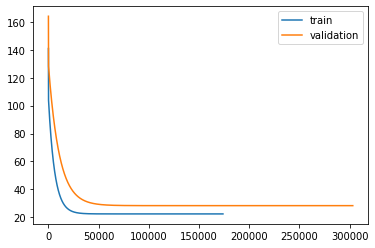

In [73]:
plot_learning_curve(lreg_l2, X.shape[0], label='train')
plot_learning_curve(lreg_l2_val, Xval.shape[0], label='validation')
plt.legend()
plt.show()

#### 7) Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X2, X3, X4, …, Xp).

In [86]:
def generate_polinome_features(X, degree):
    Xres = []
    for cur_degree in range(1, degree + 1):
        Xres.append(X.flatten() ** cur_degree)
    return np.vstack(Xres).T

#### 8) Поскольку в данной задаче будет использован полином высокой степени, то необходимо перед обучением произвести нормализацию признаков.

In [75]:
from sklearn.preprocessing import StandardScaler

In [91]:
Xp = generate_polinome_features(X, degree=8)
sc = StandardScaler()
Xp_norm = sc.fit_transform(Xp)

Xp_val = generate_polinome_features(Xval, degree=8)
Xp_val_norm = sc.transform(Xp_val)

Xp_test = generate_polinome_features(Xtest, degree=8)
Xp_test_norm = sc.transform(Xp_test)

#### 9) Обучите модель с коэффициентом регуляризации 0 и p = 8.

In [105]:
lreg_l2 = LinearRegressionL2(lr=0.1, lambda_=0)
lreg_l2.fit(Xp_norm, y, max_iters=100_000)

#### 10) Постройте график модели, совмещенный с обучающей выборкой, а также график процесса обучения. Какой вывод можно сделать в данном случае?

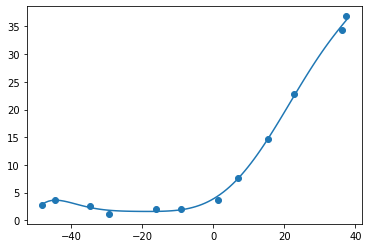

In [106]:
plt.scatter(X, y)
x = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
xp = generate_polinome_features(x, degree=8)
xp_norm = sc.transform(xp)
plt.plot(x, lreg_l2.predict(xp_norm))
plt.show()

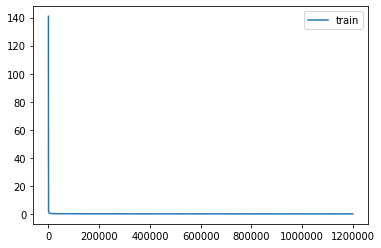

In [107]:
plot_learning_curve(lreg_l2, X.shape[0], label='train')
plt.legend()
plt.show()

#### 11) Постройте графики из пункта 10 для моделей с коэффициентами регуляризации 1 и 100. Какие выводы можно сделать?

In [115]:
C = 1 
lambda_ = 1/C
lreg_l2 = LinearRegressionL2(lr=0.1, lambda_=lambda_)
lreg_l2.fit(Xp_norm, y, max_iters=100_000)

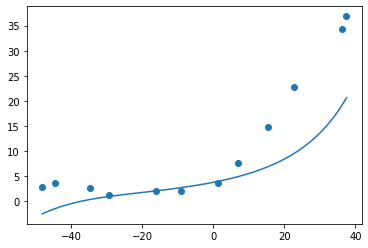

In [116]:
plt.scatter(X, y)
x = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
xp = generate_polinome_features(x, degree=8)
xp_norm = sc.transform(xp)
plt.plot(x, lreg_l2.predict(xp_norm))
plt.show()

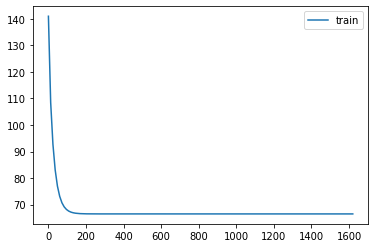

In [117]:
plot_learning_curve(lreg_l2, X.shape[0], label='train')
plt.legend()
plt.show()

In [118]:
C = 100 
lambda_ = 1/C
lreg_l2 = LinearRegressionL2(lr=0.005, lambda_=lambda_)
lreg_l2.fit(Xp_norm, y, max_iters=100_000)

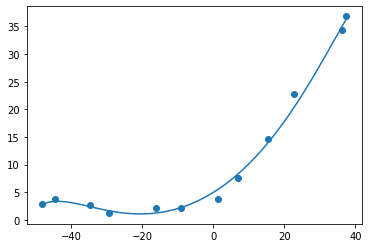

In [119]:
plt.scatter(X, y)
x = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
xp = generate_polinome_features(x, degree=8)
xp_norm = sc.transform(xp)
plt.plot(x, lreg_l2.predict(xp_norm))
plt.show()

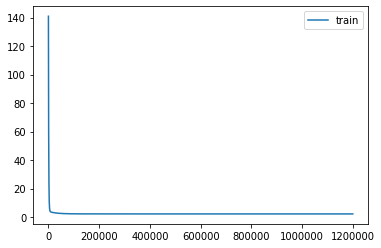

In [120]:
plot_learning_curve(lreg_l2, X.shape[0], label='train')
plt.legend()
plt.show()

#### 12) С помощью валидационной выборки подберите коэффиент регуляризации, который позволяет достичь наименьшей ошибки. Процесс подбора отразите с помощью графика (графиков).

In [131]:
from tqdm import tqdm

C_values = [10, 25, 50, 75, 100, 250, 500, 750, 1000]
train_losses, val_losses = [], []

for C in tqdm(C_values):
    lambda_ = 1/C
    lreg_l2 = LinearRegressionL2(lr=0.005, lambda_=lambda_)
    lreg_l2.fit(Xp_norm, y, max_iters=50_000)
    train_losses.append(lreg_l2.history[-1][1])
    val_loss = lreg_l2.evaluate(Xp_val_norm, yval)
    val_losses.append(val_loss)

100%|██████████| 9/9 [00:38<00:00,  4.23s/it]


[]

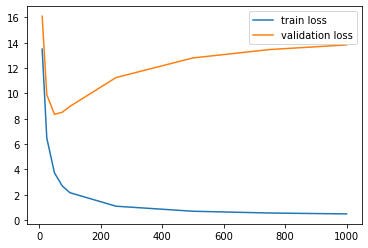

In [132]:
plt.plot(C_values, train_losses, label='train loss')
plt.plot(C_values, val_losses, label='validation loss')
plt.legend()
plt.plot()

In [130]:
val_losses

[16.096508661804883,
 9.898635315188631,
 8.349258928419182,
 8.511242498530521,
 8.972837387046233,
 11.252286297048677,
 12.803149220148374,
 13.46673948323574,
 13.832124834551934]

#### 13) Вычислите ошибку (потерю) на контрольной выборке.

In [148]:
C_best = 50
lambda_best = 1/C_best

Xp_work_norm = np.concatenate((Xp_norm, Xp_val_norm))
y_work = np.concatenate((y, yval))

lreg_l2 = LinearRegressionL2(lr=0.005, lambda_=lambda_best)
lreg_l2.fit(Xp_work_norm, y_work, max_iters=100_000)
test_loss = lreg_l2.evaluate(Xp_test_norm, ytest)

In [149]:
test_loss

5.586436750003026

In [147]:
Xp_test_norm.shape, ytest.shape

((21, 8), (21,))

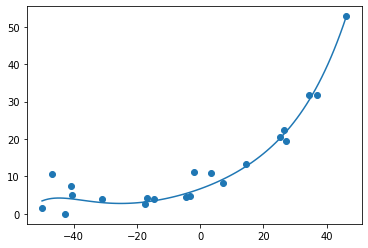

In [151]:
plt.scatter(Xtest.flatten(), ytest)
x = np.linspace(Xtest.min(), Xtest.max(), 100).reshape((-1, 1))
xp = generate_polinome_features(x, degree=8)
xp_norm = sc.transform(xp)
plt.plot(x, lreg_l2.predict(xp_norm))
plt.show()

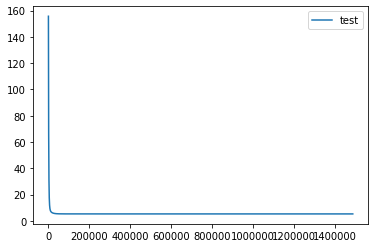

In [152]:
plot_learning_curve(lreg_l2, Xtest.shape[0], label='test')
plt.legend()
plt.show()